##**Chapter9. 추천 시스템**

###**01. 추천 시스템의 개요와 배경**

**[추천 시스템의 개요]**

 : 추천시스템을 통해 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠르 ㄹ제공해 조금이라도 오래 고객을 머무르게하는 전략.

**[추천 시스템의 유형]**

추천 시스템은 크게 콘텐츠 기반 필터링 방식과 협업 필터링 방식으로 나뉨.

협업 필터링은 최근접 이웃 협업 필터링과 잠재 요인 협업 필터링으로 나뉨.

최근에는 개인화 특성을 좀 더 강화하기 위해 하이브리드 형식으로 콘텐츠 기반과 협업 기반을 적절히 결합해 사용하는 경우도 늘고 있음.

###**02. 콘텐츠 기반 필터링 추천 시스템**

콘텐츠 기반 필터링 방식은 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식.



###**03. 최근접 이웃 협업 필터링**

사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천을 수행하는 것.
 - 주요 목표는 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것.
 - 협업 필터링 기반의 추천 시스템은 최근접 이웃 방식과 잠재 요인 방식으로 나뉘며, 모두 사용자-아이템 평점 행렬 데이터만 의지해 추천을 수행.

----------------------------------------------------
1. 사용자 기반 최근접 이웃 방식
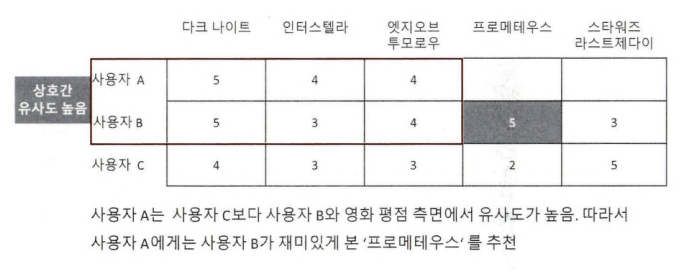

2. 아이템 기반 최근접 이웃 방식

: 아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가척도가 유사한 아이템을 추천.
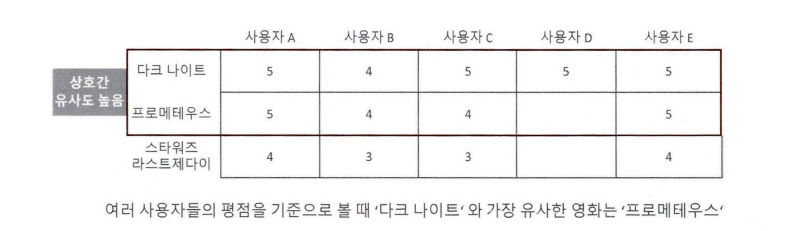

###**04.잠재 요인 협업 필터링**

**[잠재 요인 협업 필터링의 이해]**

 : 잠재 요인 협업 필터링은 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 하는 기법.

 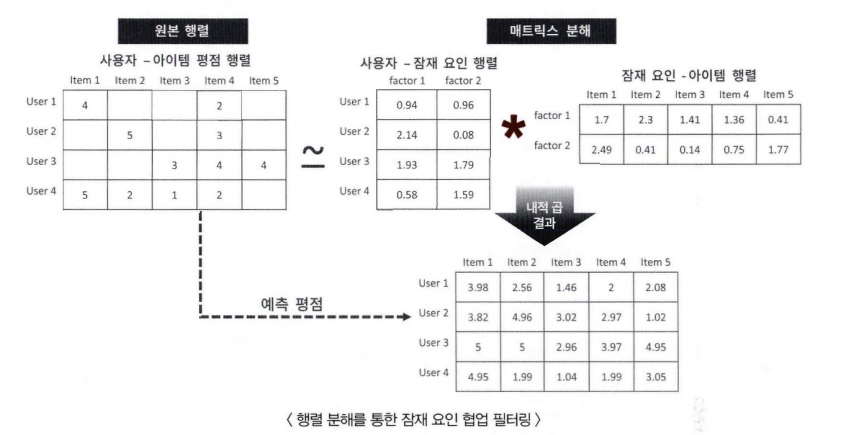

: 즉, 사용자-잠재 요인 행렬은 사용자의 영화 장르에 대한 선호도. 아이템-잠재 요인 행령은 영화의 장르 별 특성값으로 정의할 수 있음.

**[행렬 분해의 이해]**

행렬 분해는 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법으로서 대표적으로 SVD, NMF 가 있음.

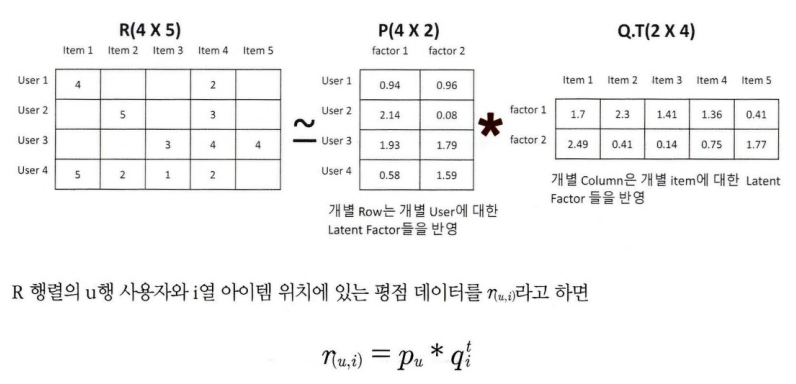

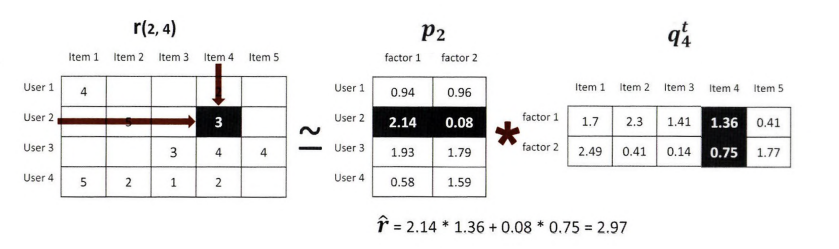

**[확률적 경사 하강법을 이용한 행렬 분해]**

P와 Q 행렬로 계산된 예측 R행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용함수 최적화를 통해 P와 Q를 유추.

In [1]:
import numpy as np

R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
            [np.NaN, 5, np.NaN, 3, 1 ],
            [np.NaN, np.NaN, 3, 4, 4],
            [5, 2, 1, 2, np.NaN]])
num_users, num_items = R.shape
K =3

np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))


In [2]:
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q,non_zeros):
    error=0
    full_pred_matrix = np.dot(P,Q.T)

    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    return rmse


In [3]:
non_zeros = [ (i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0]

steps = 1000
learning_rate = 0.01
r_lambda=0.01

for step in range(steps):
    for i, j, r in non_zeros:
        eij = r - np.dot(P[i,:],Q[j,:].T)
        P[i,:] = P[i,:]+ learning_rate *(eij*Q[j,:] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:]+ learning_rate *(eij*P[i,:] - r_lambda*Q[j,:])

        rmse = get_rmse(R,P,Q,non_zeros)
        if (step % 50) == 0:
            print("### iteration step:",step, "rmse:",rmse)

### iteration step: 0 rmse: 3.261355059488935
### iteration step: 0 rmse: 3.26040057174686
### iteration step: 0 rmse: 3.253984404542389
### iteration step: 0 rmse: 3.2521583839863624
### iteration step: 0 rmse: 3.252335303789125
### iteration step: 0 rmse: 3.251072196430487
### iteration step: 0 rmse: 3.2492449982564864
### iteration step: 0 rmse: 3.247416477570409
### iteration step: 0 rmse: 3.241926055455223
### iteration step: 0 rmse: 3.2400454107613084
### iteration step: 0 rmse: 3.240166740749792
### iteration step: 0 rmse: 3.2388050277987723
### iteration step: 50 rmse: 0.5003190892212748
### iteration step: 50 rmse: 0.5001616291326989
### iteration step: 50 rmse: 0.49899601202578087
### iteration step: 50 rmse: 0.4988483450145831
### iteration step: 50 rmse: 0.49895189256631756
### iteration step: 50 rmse: 0.49833236830090993
### iteration step: 50 rmse: 0.4984148489378701
### iteration step: 50 rmse: 0.49792599580240876
### iteration step: 50 rmse: 0.4900605568692785
### itera

In [4]:
pred_matrix = np.dot(P,Q.T)
print('예측 행렬:/n', np.round(pred_matrix,3))

예측 행렬:/n [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
